# TP Boîds

## Import

In [39]:
import numpy as np

from IPython.display import HTML as display

In [40]:
from matplotlib import animation
from matplotlib import pyplot as plt
plt.rcParams['axes.facecolor'] = 'midnightblue'
%matplotlib inline

## Prepare simulation

In [50]:
boid_count = 20
limits = np.array([2000, 2000])
alert_distance = 100
move_strength = 0.01

In [51]:
def new_flock(count, lower_limits, upper_limits):
    width = upper_limits - lower_limits
    return (lower_limits[:, np.newaxis] + np.random.rand(2, count) * width[:, np.newaxis])

## Movement functions

In [52]:
def separation(alert_distance, positions, velocities):
    separations = positions[:, np.newaxis, :] - positions[:, :, np.newaxis]
    squared_displacements = separations * separations
    square_distances = np.sum(squared_displacements, 0)
    far_away = square_distances > alert_distance
    separations_if_close = np.copy(separations)
    separations_if_close[0, :, :][far_away] = 0
    separations_if_close[1, :, :][far_away] = 0
    velocities += np.sum(separations_if_close, 1)

In [53]:
def cohesion(move_strength, positions, velocities):
    middle = np.mean(positions, 1)
    direction_to_middle = positions - middle[:, np.newaxis]
    velocities -= direction_to_middle * move_strength

In [104]:
def straight(positions, move_strength, direction):
    if direction[-4:] == "left" :
        positions[0] -= 15*100*move_strength
    elif direction[-5:] == "right" :
        positions[0] += 15*100*move_strength

    if direction[:2] == "up" :
        positions[1] += 15*100*move_strength
    elif direction[:4] == "down" :
        positions[1] -= 15*100*move_strength

In [130]:
def update_boids(positions, velocities, alert_distance, move_strength, is_straight):
    if not is_straight:
        cohesion(move_strength, positions, velocities)
        separation(alert_distance, positions, velocities)
        positions += velocities
    else :
        straight(positions, move_strength, direction = 'up_right')    

## Visualization

In [131]:
def animate(frame):
    if frame<130:
        update_boids(positions, velocities, alert_distance, move_strength, False)
    if frame>=130:
        update_boids(positions, velocities, alert_distance, move_strength, True)

    scatter.set_offsets(positions.transpose())

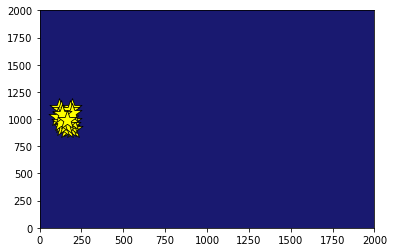

In [132]:
positions = new_flock(boid_count, np.array([100, 900]), np.array([200, 1100]))
velocities = new_flock(boid_count, np.array([0, -20]), np.array([10, 20]))


figure = plt.figure()
axes = plt.axes(xlim=(0, limits[0]), ylim=(0, limits[1]))
scatter = axes.scatter(positions[0, :], positions[1, :],
                       marker='*', s=400, edgecolor='k', color='yellow', lw=0.8)

In [133]:
anim = animation.FuncAnimation(figure, animate, frames=200, interval=50)
display(anim.to_jshtml())